# Final Models

Basically an attempt to see if given 20,000 or more posts for each, if a base logistic model will outperform the best bayes model parameters from modeling with the 100k post data. The Random Forest took far too long and will be worse with this data / had a lower test score than the bayes. Both final models proved to be better than the gridsearched models using less data <br>

ultimately a gridsearch for both transformer and logreg/bayes hyperparameters would be ideal but given the increased size of the data set I'm satisfied using the best set from earlier.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [10]:
df = pd.read_csv('./data/posts_cleaned_140k.csv')

In [11]:
X = df['title']
y = df['sub_bin']

In [12]:
y.value_counts(normalize= True)

0    0.567538
1    0.432462
Name: sub_bin, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=74)

In [17]:
tvec = TfidfVectorizer(max_features=15000, ngram_range=(1, 3),
                        stop_words='english')

tvec.fit(X_train)

X_train = tvec.transform(X_train)
X_test = tvec.transform(X_test)

In [20]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.8933345682442654
0.8666954803655224


/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

print(nb.score(X_train,y_train))
print(nb.score(X_test, y_test))

0.868471694812345
0.8527414176339837


In [19]:
X_train.shape

(97173, 15000)

Multinomial Bayes Classifications
Specificity: 0.9057332463011314
Sensitivity: 0.7831953169617362


/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


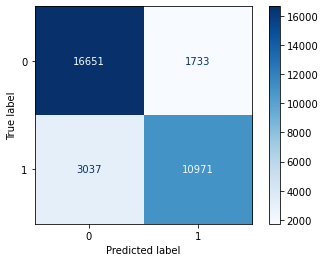

In [25]:

print('Multinomial Bayes Classifications')
plot_confusion_matrix(nb, X_test, y_test, cmap='Blues', values_format='d');


preds = nb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

spec = tn / (tn + fp)
sens = tp / (tp + fn)

print('Specificity:', spec)
print('Sensitivity:', sens)



Logistic Regression Classifications
Specificity: 0.8997497824194952
Sensitivity: 0.8233152484294689


/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


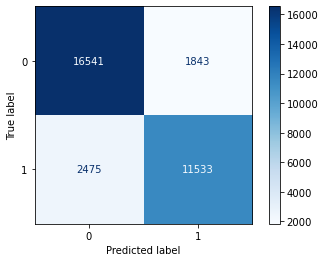

In [26]:


print('Logistic Regression Classifications')
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');


preds = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

spec = tn / (tn + fp)
sens = tp / (tp + fn)

print('Specificity:', spec)
print('Sensitivity:', sens)



Overall the Logistic Regression performed the best, with a specificity of 0.899 and a sensitivity of 0.823. The hyperparameters for the TFID classifier were determined in initial modeling (as part of EDA notebook) on data with 200 thousand total posts to start. The requests-final, cleaning-final, EDA_final, and Model-Final reflect new data that was pulled, to make the total 280,000 to start with.